# Job-Hunt NLP Demo

Which demo will also be useful in doing some quick NLP work to see how my résumé's word distribution matches that from job descriptions.

There's a wonderful project out there, [MyBinder](https://mybinder.org), which allows you to interactively run a Jupyter notebook completely online. It's nice to have when you'd like to play with code and see better the outputs that come from running that code. I've had some problems with images going down, but I'm going to work to keep this one up.

The link to the online, interactive notebook - the binder - is at the badge you see right here

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/main?labpath=A_02nd_NLPPresentationJobHunt_DemoWordFreq.ipynb)

<hr/>

## We are calling this version 0.1.002

It's for the FamilySearch CJKV jobs applied for in August 2023.

<hr/>

## Link to setup from the Conda Prompt

The instructions for setting up the conda environment from Windows is in [my first version, here on GitHub](https://github.com/bballdave025/job-app-word-freq/blob/main/A_v01_NLP_Presentation_Job_Hunt_NLP_Useful_Demo_Word_Freq.ipynb). Soon, I will figure out how to make the [MyBinder](https://mybinder.org) server <strike>[MyBinder server]()</strike> for that first version persistent, and you can look at all the setup stuff there. [![Binder](./badge_logo_dwb_v_0-1-001_merged_small.png)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/original-timed-freq?labpath=A_v01_NLP_Presentation_Job_Hunt_NLP_Useful_Demo_Word_Freq.ipynb)

## The Second Iteration

### Several FamilySearch Résumés

My friend at the [FamilySearch Library](https://www.familysearch.org/en/library/) let me know about a few job availabilities. These are all with a group - of which he and I are part - of missionaries and volunteers who have been working on [CJKV (Chinese, Japanese, Korean, Vietnamese)-character](https://en.wikipedia.org/wiki/CJKV_characters) handwriting and block-print recognition. I already put in the applications with résumés, but all résumés are pretty simple. I'm going to see how the different job descriptions compare to the résumés as regards the word-frequency distribution. 

I'm going to add some improvements to my first, time-limited version. These include the better-presentation output of the word and frequency arrays. I would also like to add something that removes small words that serve a more grammatical function; in the [NLTK book](https://www.nltk.org/book/) (Officially: BIRD, Steven; KLEIN, Ewan; and LOPER, Edward, Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit, retrieved 2023-08-07, https://web.archive.org/web/20230721043038/https://www.nltk.org/book/)
Steven Bird, Ewan Klein, and Edward Loper), these are called stopwords (cf. Chapter 2). Perhaps I'll put in some n-gram comparison, but what I'd really like to do are space-separated bigrams - now I've looked it up, and the official term is Orthogonal Sparse Bigrams (OSBs), cf [this paper](https://web.archive.org/web/20230807215040/https://www.siefkes.net/papers/winnow-spam.pdf). The paper is also in this directory as `siefkes_winnow_osb.pdf`.

## Texts

The text of my résumé for these jobs is in the local file,

```
res_CJKV.txt
```

the job descriptions for the jobs are in local files as well, specifically,

```
desc_CJKV_dev3.txt
desc_CJKV_dev4.txt
desc_CJKV_dev5.txt
desc_CJKV_devInTest3.txt
```

In [1]:
application_text_filenames = \
  ["res_CJKV.txt",
  ]

In [2]:
job_description_text_filenames = \
  ["desc_CJKV_dev5.txt",
   "desc_CJKV_dev4.txt",
   "desc_CJKV_dev3.txt",
   "desc_CJKV_devInTest3.txt",
  ]

# The "dev5" is the nicest job - and it's with Java, which I know best.

`######################################################`

The job description page looks to contain something like `JavaScript`, `ajax`, etc.

Rather than writing in a webscraper or looking through the code and finding what gets pulled from the database, I'm just going to copy/paste the text into the text files.

In [3]:
##  Code to get current timestamp, if needed.
##+ Meant to be run once, then commented out.
# #######################
# # No need to run again
# #####
# !powershell -c (Get-Date -UFormat "%s_%Y%m%dT%H%M%S%Z00") -replace '[.][0-9]*_', '_'

In [4]:
local_job_desc_filenames = job_description_text_filenames
local_job_appl_filenames = application_text_filenames

import pprint

pprint.pprint(local_job_desc_filenames)
print()
pprint.pprint(local_job_appl_filenames)

['desc_CJKV_dev5.txt',
 'desc_CJKV_dev4.txt',
 'desc_CJKV_dev3.txt',
 'desc_CJKV_devInTest3.txt']

['res_CJKV.txt']


Output was

```
['desc_CJKV_dev5.txt',
 'desc_CJKV_dev4.txt',
 'desc_CJKV_dev3.txt',
 'desc_CJKV_devInTest3.txt']

['res_CJKV.txt']
```

at `1691423942_20230807T155902-0600`

In [5]:
# read in texts to original strings

def read_in_texts(local_desc_fnames, local_appl_fnames,
                  do_combine_desc_files = False,
                  do_combine_appl_files = True
                 ):
    for_pairwise_desc_texts = []
    for_pairwise_appl_texts = []
    
    complete_description_text = ""
    complete_application_text = ""
    
    if do_combine_desc_files:
        complete_description_text = " "
    ##endof:  if do_combine-desc_files
    
    if do_combine_appl_files:
        complete_application_text = " "
    ##endof:  if do_combine_appl_files
    
    for this_description_filename in local_job_desc_filenames:
        with open(this_description_filename, 'r', encoding='utf-8') as dfh:
            this_desc_file_content_str = dfh.read()
            if do_combine_desc_files:
                complete_description_text += " " + this_desc_file_content_str
            else:
                this_desc_in_array_str = " " + this_desc_file_content_str + " "
                for_pairwise_desc_texts.append(this_desc_in_array_str)
            ##endof:  if/else do_combine_desc_files
        ##endof:  with open ... dfh
    ##endof:  for this_description_filename in local_job_desc_filenames
    
    for this_application_filename in local_job_appl_filenames:
        with open(this_application_filename, 'r', encoding='utf-8') as afh:
            this_appl_file_content_str = afh.read()
            if do_combine_appl_files:
                complete_application_text += " " + this_appl_file_content_str
            else:
                this_appl_in_array_str = " " + this_appl_file_content_str + " "
                for_pairwise_appl_texts.append(this_appl_in_array_str)
            ##endof:  if/else do_combine_appl_files
        ##endof:  with open ... afh
    ##endof:  for this_application_filename in local_job_appl_filenames
    
    complete_description_text += " "
    complete_application_text += " "
    
    if do_combine_desc_files:
        for_pairwise_desc_texts = [complete_description_text]
    ##endof:  if do_combine-desc_files
    
    if do_combine_appl_files:
        for_pairwise_appl_texts = [complete_application_text]
    ##endof:  if do_combine_appl_files
    
    return for_pairwise_desc_texts, for_pairwise_appl_texts
    
##endof:  read_in_texts(<params>)

#### This next, make_it_one_line_single_spaced function will be very useful as we go forward

In [6]:
import string
import re

def make_it_one_line_single_spaced(input_str):
    processing_str = input_str
    
    processing_str = ' '.join(processing_str.split())
    processing_str = processing_str.replace("\t", " ")
    processing_str = processing_str.replace("\n", " ")
    processing_str = re.sub(r"(^|[^ ])[ ][ ]+($|[^ ])",
                            r"\g<1> \g<2>",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    
    return processing_str
##endof:  make_it_one_line_single_spaced(input_str)

### The actual reading in of the texts

In [7]:
complete_description_text, complete_application_text = \
                    read_in_texts(local_job_desc_filenames,
                                  local_job_appl_filenames)

### Code for cleaning text

We will iterate a bit, so as not to have to write a text normalizer for the whole world. Rather than putting together regexes to test for things like which contractions are there and which other things might need changing (especially things like dashes), I'm doing simple regexes. Q&R

In [8]:
import re
import string

#from bs4 import BeautifulSoup
#from bs4 import UnicodeDammit

def clean_text_string_quickly(input_str):
    processing_str = input_str
    
    # ## one line, single-spaced
    # processing_str = ' '.join(processing_str.split())
    # processing_str = processing_str.replace("\t", " ")
    # processing_str = processing_str.replace("\n", " ")
    # processing_str = re.sub(r"(^|[^ ])[ ][ ]+($|[^ ])",
    #                         r"\g<1> \g<2>",
    #                         processing_str,
    #                         flags=re.IGNORECASE
    #                       )
    
    ## one line, single-spaced
    processing_str = make_it_one_line_single_spaced(processing_str)
    
    
    ## get rid of outside-ascii (or control character)
    processing_str = re.sub(r"[^\u0020-\u007E]",
                            " ",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    
    ## my stuff
    processing_str = re.sub(r"[ ][|]+[ ]",
                            " ",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    processing_str = processing_str.replace(r"&", "and")
    processing_str = processing_str.replace(r"U.S.", "U S ")
    
    ## get rid of punctuation
    processing_str = re.sub(r"(([^0-9 ])[.,!?:\"']([) ]|$))",
                            r"\g<2>\g<3>",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    processing_str = re.sub(r"(([0-9 ])[.,!?:\"']([ ]|$))",
                            r"\g<2>\g<3>",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    # parentheses
    processing_str = processing_str.replace(r"(", " ")
    processing_str = processing_str.replace(r")", " ")
    # dashes
    processing_str = re.sub(r"[ ][-]+[ ]",
                            " ",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    
    ##  lowercase - to skip until a few iterations through
    ##+ cleaning the text
    processing_str = processing_str.casefold()
    
    ## fixes found by iterating this cleaning function
    processing_str = re.sub(r"[ ][/][ ]",
                            " ",
                            processing_str,
                            flags=re.IGNORECASE
                           )
    
    ## What's found in the documents
    # My inspection
    processing_str = processing_str.replace(r"s.r", "s r")
    processing_str = processing_str.replace(r"c++/perl", "c++ perl")
    
    # From the automated looking, below
    processing_str = processing_str.replace(
                                 r"monitors/equipment", 
                                  "monitors equipment"
    )
    processing_str = processing_str.replace(
                                 r"product/engineering", 
                                  "product engineering"
    )
    processing_str = processing_str.replace(
                                 r"engineering/troubleshooting", 
                                  "engineering troubleshooting"
    )
    processing_str = processing_str.replace(
                                 r"engineering/programming", 
                                  "engineering programming"
    )
    processing_str = processing_str.replace(
                         r"analytical/diagnostic/troubleshooting", 
                          "analytical diagnostic troubleshooting"
    )
    processing_str = processing_str.replace(
                                 r"integration/continuous", 
                                  "integration continuous"
    )
    
    processing_str = processing_str.replace(r"net/powershell", 
                                                "net powershell")
    processing_str = processing_str.replace(r"c/c", "c c")
    
    # KEEP THESE 3 EXAMPLES IN THE CODE FOR COPY/PASTE, WHATEVER
    # processing_str = processing_str.replace(r"notice/more", 
    #                                               "notice more")
    # processing_str = processing_str.replace(r"s.r", "s r")
    # processing_str = processing_str.replace(
    #                              r"monitors/equipment", 
    #                               "monitors equipment"
    # )
    
    # ##spacing fix at the end
    # processing_str = re.sub(r"(^|[^ ])[ ][ ]+($|[^ ])",
    #                         r"\g<1> \g<2>",
    #                         processing_str,
    #                         flags=re.IGNORECASE
    #                        )
    
    ## spacing fix at the end
    processing_str = make_it_one_line_single_spaced(processing_str)
    
    ## Let's give it back
    return processing_str

##endof:  clean_text_string_quickly(input_str)

In [9]:
import re

def remove_stopwords(input_str):
    ##  From https://www.nltk.org/book/ch02.html
    ##+ > [Stopwords are] high-frequency words like the, to and also that we 
    ##+ > sometimes want to filter out of a document before further processing. 
    ##+ > Stopwords usually have little lexical content, and their presence in 
    ##+ > a text fails to distinguish it from other texts.
    
    processing_str = input_str
    
    stopwords_to_remove = [
'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 'can', 'will', 'just', 'should', 'now'
]
    
    # No attempt to optimize code, here. Q&R
    for my_stopword in stopwords_to_remove:
        #processing_str = processing_str.replace(my_stopword, " ")
        word_with_boundaries = r"\b" + my_stopword + r"\b"
        processing_str = re.sub(word_with_boundaries, " ", 
                                processing_str, 
                                flags=re.IGNORECASE)
    ##endof:  for my_stopword in stopwords_to_remove
    
    return processing_str
##endof:  remove_stopwords(input_str)

In [10]:
# We'll usually keep these two.
do_look_at_description_text = True
do_look_at_application_text = True

#  this one can go (False) if you don't want the big strings
#+ i.e. you don't want the complete file contents
do_print_the_big_strings = False

In [11]:
if do_look_at_description_text:
    test1 = []
    for desc_text_str in complete_description_text:
        test1.append(clean_text_string_quickly(desc_text_str))
        if do_print_the_big_strings:
            import pprint
            pprint.pprint(test1)

In [12]:
if do_look_at_application_text:
    test2 = []
    for appl_text_str in complete_application_text:
        test2.append(clean_text_string_quickly(appl_text_str))
        if do_print_the_big_strings:
            import pprint
            pprint.pprint(test2)

In [13]:
## Without stopwords
test1 = [make_it_one_line_single_spaced(
                                remove_stopwords(their_text)
                                       ) for their_text in test1
        ]

if do_print_the_big_strings:
    import pprint
    pprint.pprint(test1)

In [14]:
test2 = [make_it_one_line_single_spaced(
                                remove_stopwords(their_text)
                                       ) for their_text in test2
        ]

if do_print_the_big_strings:
    import pprint
    pprint.pprint(test2)

### For these next few cells, we are finding things to search and replace

In [15]:
# looking at contractions
if do_look_at_description_text:
    for their_text in test1:
        print()
        print(re.findall(r"\b('[\w']+\b|[\w']+'[\w']+|[\w']+')\b",
                         their_text)
             )


["organization's", "bachelor's", "master's"]

["bachelor's"]

["bachelor's"]

["bachelor's"]


First run-through had

```
["organization's", "bachelor's", "master's"]

["bachelor's"]

["bachelor's"]

["bachelor's"]
```

In [16]:
if do_look_at_application_text:
    for my_text in test2:
        print()
        print(re.findall(r"\b('[\w']+\b|[\w']+'[\w']+|[\w']+')\b", 
                         my_text)
             )


["workplace's", "wife's", "nist's", "container's", "mission's"]


First run-through had

```
["workplace's", "wife's", "nist's", "container's", "mission's"]
```

In [17]:
# looking at all slashes
if do_look_at_description_text:
    for their_text in test1:
        print()
        print(re.findall(r"\b[\w/]+/[\w/]+\b", 
                         their_text)
             )


[]

[]

[]

[]


First run-through had

```
['monitors/equipment']

['product/engineering', 'engineering/troubleshooting', 'monitors/equipment']

['monitors/equipment']

['engineering/programming', 'analytical/diagnostic/troubleshooting', 'monitors/equipment', 'integration/continuous']
```

In [18]:
if do_look_at_application_text:
    for my_text in test2:
        print()
        print(re.findall(r"\b[\w./]+/[\w/]+\b",
                         my_text)
             )


['github.com/bballdave025', 'stackexchange.com/users/8693193']


First run-through had

```
['github.com/bballdave025', 'stackexchange.com/users/8693193', 'net/powershell', 'c/c']
```

## Word Frequency Counts

I want to use an `OrderedDict`, rather than mess with sorting the contents of a `dict`.

In [19]:
#import sys
from collections import OrderedDict

def get_sorted_word_counts(*cleaned_strings):
                           #,
                           #do_output_sorted_file=False,
                           #sorted_filename=\
                           #    "sorted_words_from_strings.txt"):
    '''
    @return  OrderedDict
    '''
    
    EXIT_NOWORDSWEREFOUND = -1
    
    work_with_str = combine_strings(cleaned_strings)
    
    list_of_words_in_str = work_with_str.split()
    
    if len(list_of_words_in_str) <= 0:
        print("No words were found.", file=sys.stderr)
        print("The program will exit.", file=sys.stderr)
        #sys.exit(EXIT_NOWORDSWEREFOUND)
        return EXIT_NOWORDSWEREFOUND
    ##endof:  if len(list_of_words_in_str) <= 0
    
    word_count_ordered_dict = OrderedDict()
    
    for this_word in list_of_words_in_str:
        if this_word in word_count_ordered_dict:
            word_count_ordered_dict[this_word] += 1
        else:
            word_count_ordered_dict[this_word] = 1
        ##endof:  if/else this_word in list_of_words_in_str
    ##endof:  for this_word in list_of_words_in_str
    
    ## DWB note ##
    ##  At this point, the OrderedDict is sorted by the
    ##+ order in which keys were inserted, not by their
    ##+ count.
    
    for key, _ in \
          sorted(word_count_ordered_dict.items(),
                 key=lambda word_and_count: word_and_count[1],
                 reverse=True):
        word_count_ordered_dict.move_to_end(key)
    ##endof:  for myword, _ ...
    
    return word_count_ordered_dict
    
##endof:  get_sorted_word_counts(*cleaned_strings)

def combine_strings(tuple_of_strings):
                    #, 
                    #do_output_raw_file=False,
                    #raw_filename='raw_words_from_strings.txt'):
    '''
    @return  string
    '''
    
    returned_str = " "
    
    for this_str in tuple_of_strings:
        returned_str += this_str + " "
    ##endof:  for this_str in tuple_of_string
    
    ## one line, single-spaced
    returned_str = ' '.join(returned_str.split())
    returned_str = returned_str.replace("\t", " ")
    returned_str = returned_str.replace("\n", " ")
    returned_str = re.sub(r"([^ ])[ ][ ]+($|[^ ])",
                            r"\g<1> \g<2>",
                            returned_str,
                            flags=re.IGNORECASE
                           )
    
    return returned_str
##endof:  combine_strings(tuple_of_strings)

# @TODO: add a sort-by-word as well as sort-by-count flag
# @TODO:  also, print out the pre-sorted and sorted files
#       + with word lists, frequency, and in-order-of-
#       + highest-count stuff

**Only do the two below if you want a big preview! What I'm saying is, "The two cells below will give you long outputs if uncommented."**

In [20]:
#complete_description_text

In [21]:
#complete_application_text

In [22]:
## Cleaning and Counting ##

description_strings_pre = \
  [clean_text_string_quickly(this_desc_text_str) 
           for this_desc_text_str in complete_description_text]
application_strings_pre = \
  [clean_text_string_quickly(this_appl_text_str)
           for this_appl_text_str in complete_application_text]

description_strings = \
  [make_it_one_line_single_spaced(remove_stopwords(this_desc)) 
           for this_desc in description_strings_pre]
application_strings = \
  [make_it_one_line_single_spaced(remove_stopwords(this_appl)) 
           for this_appl in application_strings_pre]

description_word_counts = \
  [get_sorted_word_counts(description_str) \
              for description_str in description_strings]
application_word_counts = \
  [get_sorted_word_counts(application_str) \
              for application_str in application_strings]

**Once again, the four cells below will give you long outputs if uncommented.**

In [23]:
#description_strings

In [24]:
#description_word_counts

In [25]:
#application_strings

In [26]:
#application_word_counts

The next code will take care of the issue I described thusly:
> It's annoying me not to have a nice, aligned output for these 2d lists - basically, they're tables. I need to bring in some previous code that takes care of getting stuff printed nice. That will be after the Q&R.

In [27]:
import string
from io import StringIO
import re

def print_2d_list_columns_aligned(list_2d_to_print,
                                  joining_delimiter = ",  ",
                                  do_output_as_str_and_print = False,
                                  do_see_the_guts=False):
    ##  The  do_see_the_guts boolean is partly for debugging,
    ##+ partly for remembering and teaching how the process
    ##+ works.
    
    ## Make all elements strings - so we can use len()
    list_2d_all_strings = \
      [[str(item) for item in row] for row in list_2d_to_print]
    
    if do_see_the_guts:
        print()
        print("  list_2d_all_strings:")
        print(list_2d_all_strings)
        print()
    ##endof:  if do_see_the_guts
    
    #  We want to find the max string length for each column
    #+ We can basically transpose the 2d_list to get the
    #+ content of each column
    list_of_column_elems_as_tuples = \
                 [column for column in zip(*list_2d_all_strings)]
    
    if do_see_the_guts:
        print()
        print("  list_of_column_elems_as_tuples:")
        print(list_of_column_elems_as_tuples)
        print()
    ##endof:  if do_see_the_guts
    
    ## find the max string length for each tuple (each column)
    list_of_max_str_len_by_column = \
      [max([len(strng) for strng in tpl]) 
        for tpl in list_of_column_elems_as_tuples]
    # -v- gives array with elements being each longest string
    #[max([strng for strng in tpl], key=len) for tpl in list_of_column_elems_as_tuples]
    # -v- 2d array with strings
    #[[strng for strng in tpl] for tpl in list_of_column_elems_as_tuples]
    
    if do_see_the_guts:
        print()
        print("  list_of_max_str_len_by_column:")
        print(list_of_max_str_len_by_column)
        print()
    ##endof:  if do_see_the_guts
    
    # output_as_str_not_list = False
    
    # Create a formatter for each row
    
    #if not output_as_str_not_list:
    joining_delimiter = "," + joining_delimiter
    
    fmt_str = \
      joining_delimiter.join('{{:{}}}'.format(max_len) 
                               for max_len in list_of_max_str_len_by_column)
    #if not output_as_str_not_list:
    fmt_str = "[" + fmt_str + "],"
    
    if do_see_the_guts:
        print()
        print("  fmt_str:")
        print(fmt_str)
        print()
    ##endof:  if do_see_the_guts
    
    # Get a string for each row, formatted correctly
    list_of_formatted_row_strings = \
      [fmt_str.format(*row) for row in list_2d_all_strings]
    
    if do_see_the_guts:
        print()
        print("  list_of_formatted_row_strings:")
        print(list_of_formatted_row_strings)
        print()
    ##endof:  if do_see_the_guts
    
    # if output_as_str_not_list:
    #     aligned_table_to_return = '\n'.join(list_of_formatted_row_strings)
    #     
    #     print(aligned_table_to_return)
    #     return aligned_table_to_return
    # ##endof:  if output_as_str_not_list
    
    s = StringIO()
    print(*list_of_formatted_row_strings, file=s)
    output_table_raw = s.getvalue()
    
    output_table_raw = re.sub(r"^\[", r"[[ ", output_table_raw)
    output_table_raw = re.sub(r"\],$", r"]]", output_table_raw)
    #output_table_raw = re.sub(r"([^ ])\],", r"\g<1> ],", output_table_raw)
    output_table_raw = re.sub(r"\],", r" ],", output_table_raw)
    output_table_raw = re.sub(r",,", r" ,", output_table_raw)
    output_table_raw = re.sub(r"]]", r" ]]", output_table_raw)
    
    aligned_table_to_return = output_table_raw.replace(r"], [", "],\n [ ")
    
    print(aligned_table_to_return)
    
    if do_output_as_str_and_print:
        return aligned_table_to_return
    ##endof:  if do_output_as_str_and_print
    
##endof:  print_2d_list_colunns_aligned(<params>)

In [28]:
# ##  Uncomment if you want to see the guts of a small example
# ##+ that's been hacked into working all right
# print_2d_list_columns_aligned([['hey', 7], ['work', 3], ['stupid', 2]], do_see_the_guts=True)

In [29]:
## Only change this boolean to True if you want to see a lot of output. ##
do_print_long_full_version = False

if do_print_long_full_version:
    #import pprint
    
    dashes="------------------------------------------------------------"
    short_dashes="-----"
    
    this_d_str_counter = -1 # quick hack for zero-indexed
    
    for d_word_count_dict in description_word_counts:
        this_d_str_counter += 1
        
        #  I haven't yet written this for several resumes, so
        #+ it just compares each description with the first
        #+ (or, likely, combined) thing in the resume stuff.
        this_a_str_index = 0
        a_word_count_dict = application_word_counts[this_a_str_index]
        
        print()
        print()
        print(dashes)
        print(f" For the job description with index, {this_d_str_counter}")
        print( " (meaning it's from the file:")
        print(f"   {local_job_desc_filenames[this_d_str_counter]}),")
        print(short_dashes)
        this_d_wdct_items_list = list(d_word_count_dict.items())
        this_d_wdct_2d_list = [list (ele) for ele in this_d_wdct_items_list]
        #pprint.pprint(this_d_wdct_2d_list)
        print_2d_list_columns_aligned(this_d_wdct_2d_list)
        print(dashes)
        print()
        print()
        print(dashes)
        print( " For the job application material (résumé, cover letter, etc.)")
        print(f" with index, {this_a_str_index}")
        print( "(meaning it's from the file:")
        print(f"   {local_job_appl_filenames[this_a_str_index]}),")
        print(short_dashes)
        this_a_wdct_items_list = list(a_word_count_dict.items())
        this_a_wdct_2d_list = [list (ele) for ele in this_a_wdct_items_list]
        #pprint.pprint(this_a_wdct_2d_list)
        print_2d_list_columns_aligned(this_a_wdct_2d_list)
        print(dashes)
        print()
        print()
        print(dashes)
        print(dashes)
        print()
        print()
    ##endof:  for d_word_count_dict in description_word_counts
##endof:  if do_print_long_full_version

In [30]:
desc_counter = -1 # hack for zero-indexing
appl_index   =  0 #  combining application files
                  #+ (actually, here, there's only one file)

description_items_list = []
application_items_list = []

this_a_word_count = application_word_counts[appl_index]
application_items = list(this_a_word_count.items())
application_items_list.append(application_items)

for this_d_word_count in description_word_counts:
    desc_counter += 1
    
#     #  I haven't yet written this for several resumes, so
#     #+ it just compares each description with the first
#     #+ (or, likely, combined) thing in the resume stuff.
#     this_a_word_count = application_word_counts[appl_index]
    
    description_items_list.append(list(this_d_word_count.items()))
#     application_items = list(this_a_word_count.items())
    
    n_words_description = len(description_items_list[desc_counter])
    n_words_application = len(application_items_list[appl_index])
    
    print()
    print("NOTE THAT THESE ARE THE NUMBERS OF DISTINCT WORDS")
    print()
    print(f" For the job description with index, {desc_counter}")
    print( " (meaning it's from the file:")
    print(f"   {local_job_desc_filenames[desc_counter]}),")
    print("AND")
    print( " For the job application material (résumé, cover letter, etc.)")
    print(f" with index, {appl_index}")
    print( "(meaning it's from the file:")
    print(f"   {local_job_appl_filenames[appl_index]}),")
    print()
    print(f"n_words_description = {str(n_words_description)}")
    print(f"n_words_application = {str(n_words_application)}")
    print()
    print()
    
##endof:  for this_d_word_count in description_word_counts


NOTE THAT THESE ARE THE NUMBERS OF DISTINCT WORDS

 For the job description with index, 0
 (meaning it's from the file:
   desc_CJKV_dev5.txt),
AND
 For the job application material (résumé, cover letter, etc.)
 with index, 0
(meaning it's from the file:
   res_CJKV.txt),

n_words_description = 329
n_words_application = 480



NOTE THAT THESE ARE THE NUMBERS OF DISTINCT WORDS

 For the job description with index, 1
 (meaning it's from the file:
   desc_CJKV_dev4.txt),
AND
 For the job application material (résumé, cover letter, etc.)
 with index, 0
(meaning it's from the file:
   res_CJKV.txt),

n_words_description = 295
n_words_application = 480



NOTE THAT THESE ARE THE NUMBERS OF DISTINCT WORDS

 For the job description with index, 2
 (meaning it's from the file:
   desc_CJKV_dev3.txt),
AND
 For the job application material (résumé, cover letter, etc.)
 with index, 0
(meaning it's from the file:
   res_CJKV.txt),

n_words_description = 275
n_words_application = 480



NOTE THAT TH

In [31]:
import sys
import copy

#<strike>### FOR NOW, CHANGE THIS FOR EACH DESCRIPTION ###</strike>

#    ##  Not handling ties differently - whichever shows up first gets the
#    ##+ higher ranking
#
#    # # These start out impossible, so we'll know if we use it without changing
#    # this_d_tie_dict_index = -1
#    # this_d_tie_value = -1
#    # this_a_tie_dict_index = -1
#    # this_a_tie_value = -1

table_version_desc = None
table_version_appl = None
table_version_both = None

list_of_table_version_desc = []
list_of_table_version_appl = []
list_of_table_version_both = []

# ##  We will do the following for headers
# table_version_desc_start = [["desc_word", "desc_cnt", "desc_rank"],]
# table_version_appl_start = [["appl_word", "appl_cnt", "appl_rank"],]
# table_version_both_start = [["rank", "desc_word", "desc_cnt", 
#                              "appl_word", "appl_cnt"],
#                            ]
#### Dang immutable, pass-by-reference Python stuff. : )


for this_description_items in description_items_list:
    if table_version_desc is not None:
        table_version_desc.clear()
    if table_version_appl is not None:
        table_version_appl.clear()
    if table_version_both is not None:
        table_version_both.clear()
    
    table_version_desc = [["desc_word", "desc_cnt", "desc_rank"],]
    table_version_appl = [["appl_word", "appl_cnt", "appl_rank"],]
    table_version_both = [["rank", "desc_word", "desc_cnt", 
                           "appl_word", "appl_cnt"],
                         ]
    
    for this_idx in range(max(len(this_description_items),
                              len(application_items)
                             ) - 1
                          ):
        
        this_rank = this_idx + 1
        
        this_description_word  = ""
        this_description_count = ""
        this_description_rank  = ""
        
        if this_idx < len(this_description_items) - 1:
            try:
                this_description_word  = this_description_items[this_idx+1][0]
            except IndexError as ie:
                print("OTHER ERROR desc word!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {str(this_idx)}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"len(this_description_items): {str(len(this_description_items))}", file=sys.stderr)
                end_of_data_bool_try = ( this_idx <= len(this_description_items) )
                print(f"end_of_data_bool_try: {str(end_of_data_bool_try)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally

            try:
                this_description_count = this_description_items[this_idx+1][1]
            except IndexError as ie:
                print("OTHER ERROR desc count!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {str(this_idx)}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"len(this_description_items): {str(len(this_description_items))}", file=sys.stderr)
                end_of_data_bool_try = ( this_idx <= len(this_description_items) )
                print(f"end_of_data_bool_try: {str(end_of_data_bool_try)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally

            this_description_rank  = this_rank
        else:
            this_description_word  = "-- N/A --"
            this_description_count = "-- N/A --"
            this_description_rank  = "-- N/A --"
        ##endof:  if/else this_idx < len(description_items)
        
        this_application_word  = ""
        this_application_count = ""
        this_application_rank  = ""
        
        if this_idx < len(application_items) - 1:
            try:
                this_application_word  = application_items[this_idx+1][0]
            except IndexError as ie:
                print("OTHER ERROR appl word!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {str(this_idx)}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"len(application_items): {str(len(application_items))}", file=sys.stderr)
                end_of_data_bool_try = ( this_idx <= len(application_items) )
                print(f"end_of_data_bool_try: {str(end_of_data_bool_try)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally

            try:
                this_application_count = application_items[this_idx+1][1]
            except IndexError as ie:
                print("OTHER ERROR appl count!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {str(this_idx)}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"len(application_items): {str(len(application_items))}", file=sys.stderr)
                end_of_data_bool_try = ( this_idx <= len(application_items) )
                print(f"end_of_data_bool_try: {str(end_of_data_bool_try)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally

            this_application_rank  = this_rank
        else:
            this_application_word  = "-- N/A --"
            this_application_count = "-- N/A --"
            this_application_rank  = "-- N/A --"
        ##endof:  if/else this_idx < len(application_items)

        if this_description_word != "-- N/A --":
            try:
                table_version_desc.append([this_description_word, 
                                           this_description_count, 
                                           this_rank]
                                         )
            except IndexError as ie:
                print("ERROR desc!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {str(this_idx)}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"this_description_word: {str(this_description_word)}", file=sys.stderr)
                print(f"this_description_count: {str(this_description_count)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/except/finally

        ##endof:  if this_description_word != "-- N/A --"

        if this_application_word != "-- N/A --":
            try:
                table_version_appl.append([this_application_word, 
                                           this_application_count, 
                                           this_rank
                                          ]
                                         )
            except IndexError as ie:
                print("ERROR appl!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"this_idx: {this_idx}", file=sys.stderr)
                print(f"this_rank: {str(this_rank)}", file=sys.stderr)
                print(f"this_application_word: {str(this_application_word)}", file=sys.stderr)
                print(f"this_application_count: {str(this_application_count)}", file=sys.stderr)
            finally:
                pass
            ##endof:  try/except/finally

        ##endof:  if this_application_word != "-- N/A --"

        try:
            table_version_both.append([this_rank, 
                                       this_description_word, 
                                       this_description_count,
                                       this_application_word, 
                                       this_application_count
                                      ]
                                     )
        except IndexError as ie:
            print("ERROR both!", file=sys.stderr)
            print(str(ie), file=sys.stderr)
            print(f"this_idx: {this_idx}", file=sys.stderr)
            print(f"this_rank: {str(this_rank)}", file=sys.stderr)
            print(f"this_description_word: {str(this_description_word)}", file=sys.stderr)
            print(f"this_description_count: {str(this_description_count)}", file=sys.stderr)
            print(f"this_application_word: {str(this_application_word)}", file=sys.stderr)
            print(f"this_application_count: {str(this_application_count)}", file=sys.stderr)
        finally:
            pass
        ##endof:  try/except/finally

    ##endof:  for this_idx in max(<n_desc_words>, <n_appl_words>)
    
    deep_desc = copy.deepcopy(table_version_desc)
    deep_appl = copy.deepcopy(table_version_appl)
    deep_both = copy.deepcopy(table_version_both)
    
    list_of_table_version_desc.append(deep_desc)
    list_of_table_version_appl.append(deep_appl)
    list_of_table_version_both.append(deep_both)
    
##endof:  for this_description_items in description_items_list

**The next 3 cells are other cells for which, if the code be uncommented, you will get a lot of output.**

In [32]:
#import pprint; pprint.pprint(list_of_table_version_desc)

In [33]:
#import pprint; pprint.pprint(list_of_table_version_appl)    

In [34]:
#import pprint; pprint.pprint(list_of_table_version_both)

In [35]:
###
##  Set up the display the first n_lines_to_display 
##+ of the tables, nicely

#### This next one is the one you might change
n_lines_to_display_orig = 25

n_header_lines = 1
n_lines_to_display = n_lines_to_display_orig
n_lines_to_display_desc = n_lines_to_display_orig
n_lines_to_display_appl = n_lines_to_display_orig

## Here is where the code for doing it with lists of strings comes

display_table_desc = None
display_table_appl = None
display_table_both = None

list_of_display_table_desc = []
list_of_display_table_appl = []
list_of_display_table_both = []

for desc_fname_idx_for_now in range(len(list_of_table_version_desc)):
    #  find out which one is longer. Make that the length of the
    #+ display_table_both
    do_cut_down_desc = ( n_lines_to_display_orig >
                            len(list_of_table_version_desc[desc_fname_idx_for_now]) 
    )
    if do_cut_down_desc:
        n_lines_to_display_desc = len(list_of_table_version_desc[desc_fname_idx_for_now])
    ##endof:  if do_cut_down_desc
    
    do_cut_down_appl = ( n_lines_to_display_orig >
                            len(list_of_table_version_appl[desc_fname_idx_for_now]) 
    )
    if do_cut_down_appl:
        n_lines_to_display_appl = len(list_of_table_version_appl[desc_fname_idx_for_now])
    ##endof:  if do_cut_down_appl
    
    # start with a new, immutable, pass-by-reference table
    if display_table_desc is not None:
        display_table_desc.clear()
    if display_table_appl is not None:
        display_table_appl.clear()
    if display_table_both is not None:
        display_table_both.clear()
    
    # get headers
    display_table_desc = [list_of_table_version_desc[desc_fname_idx_for_now][0]]
    display_table_appl = [list_of_table_version_appl[desc_fname_idx_for_now][0]]
        # made copies to make it easier
    display_table_both = [list_of_table_version_both[desc_fname_idx_for_now][0]]
    
    if ( len(list_of_table_version_desc[desc_fname_idx_for_now]) - n_header_lines < n_lines_to_display or
         len(list_of_table_version_appl[desc_fname_idx_for_now]) - n_header_lines < n_lines_to_display
    ):
        n_lines_to_display = min(len(list_of_table_version_desc[desc_fname_idx_for_now]) - n_header_lines,
                                 len(list_of_table_version_appl[desc_fname_idx_for_now]) - n_header_lines)
    ##endof:  if <n_lines_conditions>
    
    
    for table_idx in range(n_header_lines, 
                           n_lines_to_display_orig + n_header_lines):
        if table_idx - n_header_lines < n_lines_to_display_desc:
            try:
                display_table_desc.append(list_of_table_version_desc[desc_fname_idx_for_now][table_idx])
            except IndexError as ie:
                print("ERROR display_table_desc!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"table_idx: {table_idx}", file=sys.stderr)
                print(f"n_lines_to_display_desc: {n_lines_to_display_desc}", file=sys.stderr)
                print(f"len(list_of_table_version_desc[{desc_fname_idx_for_now}]):" + \
                      f" {len(list_of_table_version_desc[desc_fname_idx_for_now])}", 
                      file=sys.stderr)
            except Error as e:
                print("DIFFERENT ERROR display_table_desc!", file=sys.stderr)
                print(str(e), file=sys.stderr)
                print(f"table_idx: {table_idx}", file=sys.stderr)
                print(f"n_lines_to_display_desc: {n_lines_to_display_desc}", file=sys.stderr)
                print(f"len(list_of_table_version_desc[{desc_fname_idx_for_now}]):" + \
                      f" {len(list_of_table_version_desc[desc_fname_idx_for_now])}", 
                      file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally
        ##endof:  if table_idx - n_header_lines < n_lines_to_display_desc
        
        if table_idx - n_header_lines < n_lines_to_display_appl:
            try:
                display_table_appl.append(list_of_table_version_appl[desc_fname_idx_for_now][table_idx])
            except IndexError as ie:
                print("ERROR display_table_appl!", file=sys.stderr)
                print(str(ie), file=sys.stderr)
                print(f"table_idx: {table_idx}", file=sys.stderr)
                print(f"n_lines_to_display_appl: {n_lines_to_display_appl}", file=sys.stderr)
                print(f"len(list_of_table_version_appl[{desc_fname_idx_for_now}]):" + \
                      f" {len(list_of_table_version_appl[desc_fname_idx_for_now])}", 
                      file=sys.stderr)
            except Error as e:
                print("DIFFERENT ERROR display_table_appl!", file=sys.stderr)
                print(str(e), file=sys.stderr)
                print(f"table_idx: {table_idx}", file=sys.stderr)
                print(f"n_lines_to_display_appl: {n_lines_to_display_appl}", file=sys.stderr)
                print(f"len(list_of_table_version_appl[{desc_fname_idx_for_now}]):" + \
                      f" {len(list_of_table_version_appl[desc_fname_idx_for_now])}", 
                      file=sys.stderr)
            finally:
                pass
            ##endof:  try/catch/finally
        ##endof:  if table_idx - n_header_lines < n_lines_to_display_appl
        
        try:
            display_table_both.append(list_of_table_version_both[0][table_idx])
        except IndexError as ie:
            print("ERROR display_table_both!", file=sys.stderr)
            print(str(ie), file=sys.stderr)
            print(f"table_idx: {table_idx}", file=sys.stderr)
            print(f"len(list_of_table_version_both[{desc_fname_idx_for_now}]):" + \
                  f" {len(list_of_table_version_both[0])}", 
                  file=sys.stderr)
        finally:
            pass
        ##endof:  try/catch/finally
    ##endof:  for idx in range(<n_lines stuff>)
    
    ####  Dang immutable, pass-by-reference Python stuff. : )
    ####+ I'm used to more C-style, but I'm getting better.
    deep_display_desc = copy.deepcopy(display_table_desc)
    deep_display_appl = copy.deepcopy(display_table_appl)
    deep_display_both = copy.deepcopy(display_table_both)
    
    list_of_display_table_desc.append(deep_display_desc)
    list_of_display_table_appl.append(deep_display_appl)
    list_of_display_table_both.append(deep_display_both)
##endof:  for desc_fname_idx_for_now in range(range(list_of_table_version_desc)

In [36]:
long_dashes = "--------------------------------------------------------------"
short_dashes = "-----"

In [37]:
for desc_fname_idx_for_now in range(len(list_of_display_table_desc)):
    print()
    print(long_dashes)
    print(f"len(list_of_display_table_desc[{desc_fname_idx_for_now}]):"+ \
          f" {len(list_of_table_version_desc[desc_fname_idx_for_now])}")
    print(f"len(display_table_desc): {len(display_table_desc)}")
    print()
    print(f"len(list_of_display_table_appl[{desc_fname_idx_for_now}]):" + \
          f" {len(list_of_display_table_appl[desc_fname_idx_for_now])}")
    print(f"len(display_table_appl): {len(display_table_appl)}")
    print()
    print(f"len(list_of_display_table_both[{desc_fname_idx_for_now}]):" + \
          f" {len(list_of_display_table_both[desc_fname_idx_for_now])}")
    print(f"len(display_table_both): {len(display_table_both)}")
    print(long_dashes)
    print()
##endof:  for desc_fname_idx_for_now in range(len(list_of_table_version_desc)):


--------------------------------------------------------------
len(list_of_display_table_desc[0]): 329
len(display_table_desc): 26

len(list_of_display_table_appl[0]): 26
len(display_table_appl): 26

len(list_of_display_table_both[0]): 26
len(display_table_both): 26
--------------------------------------------------------------


--------------------------------------------------------------
len(list_of_display_table_desc[1]): 295
len(display_table_desc): 26

len(list_of_display_table_appl[1]): 26
len(display_table_appl): 26

len(list_of_display_table_both[1]): 26
len(display_table_both): 26
--------------------------------------------------------------


--------------------------------------------------------------
len(list_of_display_table_desc[2]): 275
len(display_table_desc): 26

len(list_of_display_table_appl[2]): 26
len(display_table_appl): 26

len(list_of_display_table_both[2]): 26
len(display_table_both): 26
--------------------------------------------------------------


---

In [38]:
#import pprint

desc_counter = -1 # hack for zero-indexed
for this_desc_disp_table in list_of_display_table_desc:
    print()
    print(long_dashes + short_dashes)
    desc_counter += 1
    print( "JOB DESCRIPTION (TOP 25)")
    print(f"  from file: {local_job_desc_filenames[desc_counter]}")
    print(short_dashes)
    #pprint.pprint(display_table_desc)
    print_2d_list_columns_aligned(this_desc_disp_table)
    print()
    print(long_dashes)
    print()
##endof:  for this_desc_disp_table in list_of_display_table_desc

print(long_dashes + 2*short_dashes)
print(long_dashes + 2*short_dashes)

for this_appl_disp_table in list_of_display_table_appl:
    print()
    print(long_dashes)
    print("JOB APPLICATION STUFF - RéSUMé AND COVER LETTER (TOP 25)")
    print(short_dashes)
    #pprint.pprint(display_table_appl)
    print_2d_list_columns_aligned(this_appl_disp_table)
    print()
    print(long_dashes)
    print()
##endof:  for this_appl_disp_table in list_of_display_table_appl

print(long_dashes + 2*short_dashes)
print(long_dashes + 2*short_dashes)

other_desc_counter = -1 # hack for zero-indexed
for this_both_disp_table in list_of_display_table_both:
    print()
    print(long_dashes)
    other_desc_counter += 1
    print("COMPARISON OF DESCRIPTION AND APPLICATION (TOP 25)")
    print(f"  from file: {local_job_desc_filenames[other_desc_counter]}")
    print(short_dashes)
    #pprint.pprint(display_table_both)
    print_2d_list_columns_aligned(this_both_disp_table)
    print()
    print(long_dashes)
##endof:  for this_both_disp_table in list_of_table_version_both:


-------------------------------------------------------------------
JOB DESCRIPTION (TOP 25)
  from file: desc_CJKV_dev5.txt
-----
[[ desc_word    ,  desc_cnt ,  desc_rank ],
 [ work         ,  8        ,  1         ],
 [ team         ,  7        ,  2         ],
 [ church       ,  6        ,  3         ],
 [ technical    ,  6        ,  4         ],
 [ engineering  ,  6        ,  5         ],
 [ experience   ,  6        ,  6         ],
 [ development  ,  5        ,  7         ],
 [ professional ,  4        ,  8         ],
 [ role         ,  4        ,  9         ],
 [ product      ,  4        ,  10        ],
 [ programming  ,  4        ,  11        ],
 [ seek         ,  3        ,  12        ],
 [ teams        ,  3        ,  13        ],
 [ job          ,  3        ,  14        ],
 [ industry     ,  3        ,  15        ],
 [ practices    ,  3        ,  16        ],
 [ position     ,  3        ,  17        ],
 [ areas        ,  3        ,  18        ],
 [ design       ,  3        ,  1

In [39]:
def get_description_word_at_rank(this_rank = 1, 
                                 this_desc_fname_idx=0,
                                 do_print_details=False
                                ):
    this_idx = this_rank # the header is index 0
    this_table_to_use = \
      list_of_display_table_desc[this_desc_fname_idx]
    this_word = this_table_to_use[this_rank][0]
    if do_print_details:
        print()
        print(f"  The job description word at rank {this_rank},")
        print( 
          ( "  from file:"
           f" '{local_job_desc_filenames[this_desc_fname_idx]}',"
          )
)
        print(f"  is '{this_word}'.")
        print()
    ##endof: if do_print_details
    
    return this_word
##endof:  get_description_word_at_rank(<params>)

def get_application_word_at_rank(this_rank = 1, 
                                 do_print_details=False
                                ):
    this_idx = this_rank # the header is index 0
    this_appl_fname_idx=0
    this_table_to_use = \
      list_of_display_table_appl[this_appl_fname_idx]
    this_word = this_table_to_use[this_rank][0]
    if do_print_details:
        print()
        print(f"  The job application word at rank {this_rank},")
        print( 
          ( "  from file:"
           f" '{local_job_appl_filenames[this_appl_fname_idx]}',"
          )
)
        print(f"  is '{this_word}'.")
        print()
    ##endof: if do_print_details
    
    return this_word
##endof:  get_description_word_at_rank(<params>)

In [40]:
get_description_word_at_rank(1, do_print_details=True);
get_application_word_at_rank(1, do_print_details=True);


  The job description word at rank 1,
  from file: 'desc_CJKV_dev5.txt',
  is 'work'.


  The job application word at rank 1,
  from file: 'res_CJKV.txt',
  is 'software'.



### Seems like a good time to look at comparisons

#### Between the résumé and the different job descriptions

In [41]:
def find_word_in_both_display_lists(word_to_find,
                                    display_list_1_description,
                                    display_list_2_application,
                                    name_of_display_list_1=None,
                                    name_of_display_list_2=None,
                                    do_print_details=False
                                   ):
    index_count_1 = 0 # skip header
    index_for_found_in_1 = 0
    
    loop_display_list = display_list_1_description
    
    word_found_in_1 = False
    for my_entry_1 in display_list_1_description:
        index_count_1 += 1
        print(f"index_count_1: {index_count_1}")
        print(f"my_entry_1: {my_entry_1}")
        print(f"word_to_find: {word_to_find}")
        print(f"my_entry_1 == word_to_find: {my_entry_1 == word_to_find}")
        input("figure it out then press enter")
        if my_entry_1 == word_to_find:
            print("we got the match")
            word_found_in_1 = True
            index_for_found_in_1 = index_count_1
            print(f"word_found_in_1: {word_found_in_1}")
            print(f"index_for_found_in_1: {index_for_found_in_1}")
            break
        ##endof:  if my_entry_1 == word_to_find
    ##endof:  for my_entry_1 in display_list_1
    
    print()
    print("out of loop 1")
    input("press enter")
    print()
    
    index_count_2 = 0 # skip header
    index_for_found_in_2 = -1
    word_found_in_2 = False
    for my_entry_2 in display_list_2_application:
        index_count_2 += 1
        print(f"my_entry_2: {my_entry_2}")
        print(f"word_to_find: {word_to_find}")
        print(f"my_entry_2 == word_to_find: {my_entry_2 == word_to_find}")
        input("figure it out then press enter")
        if my_entry_2 == word_to_find:
            word_found_in_2 = True
            index_for_found_in_2 = index_count_2
            break
        ##endof:  if my_entry_2 == word_to_find
    ##endof:  for my_entry_1 in display_list_1
    
    to_return_found_1 = None
    
    if word_found_in_1:
        to_return_found_1 = index_for_found_in_1 - 1
        if do_print_details:
            print()
            print(f"The word, {word_to_find}, has rank, {to_return_found_1},")
            if name_of_display_list_1 is not None:
                print(f"in list, {name_of_display_list_1}.")
            #endof:  if name_of_display_list_1 is not None
        ##endof:  if do_print_details
    ##endof:  if word_found_in_1
    
    to_return_found_2 = None
    
    if word_found_in_2:
        to_return_found_2 = index_for_found_in_2 - 1
        if do_print_details:
            print()
            print(f"The word, {word_to_find}, has rank, {to_return_found_2},")
            if name_of_display_list_2 is not None:
                print(f"in list, {name_of_display_list_2}.")
            ##endof:  if name_of_display_list_2 is not None
        ##endof:  if do_print_details
    ##endof:  if word_found_in_2
    
    return to_return_found_1, to_return_found_2
    
##endof:  find_word_in_both_lists

In [42]:
import numpy as np
import matplotlib.pyplot as plt

## Next line only for Jupyter notebook.
%matplotlib inline

def get_freq_histo_specific(word_count_ordered_dict_1,
#                           word_count_ordered_dict_2,
                            rank_index_1 = 1,
                            n_surrounding_words = 3,
                            do_show_word_and_count_lists=False,
                            ax1=None,
#                           ,ax2=None
                            ylim_bottom_val=None,
                            ylim_top_val=None
                           ):
    '''
    @return  an axis from matplotlab (with the object - histogram - in it)
    '''
    
    if ax1 is None:
        fig = plt.figure(figsize=(10, 3))
        ax1 = fig.add_subplot(111)
#       ax2 = fig.add_subplot(121)
    
    counts_pre = list(word_count_ordered_dict_1.values())
    words_pre  = list(word_count_ordered_dict_1.keys())
    
    #word_1, count_1 = word_count_ordered_dict_1[rank_index_1]
    
    #highest_rank_index = -1
    
    # Pad the list with zero-count and empty-set characters
    len_lists = 2 * n_surrounding_words + 1
    counts = [0] * len_lists
    words  = ["\u2205"] * len_lists
    
    #  Fill anything with a valid index with the corresponding
    #+ word/count
    
    current_output_index = -1
    
    for i in range(rank_index_1 - n_surrounding_words,
                   rank_index_1 + n_surrounding_words + 1
                  ):
        current_output_index += 1
        if i < 1:
            pass
        else:
            counts[current_output_index] = counts_pre[i]
            words[current_output_index] = words_pre[i]
        ##endof:  if/else i < 1
    ##endof:  for i in range
    
    ## making sure things are working
    if do_show_word_and_count_lists:
        print(f"counts: {counts}")
        print(f"words:  {words}")
    ##endof:  if do_show_word_and_count_lists
    
    #input("Press [Enter] to continue.")
    
    x_words_coords = np.arange(len(words))
    ax1.bar(x_words_coords, counts, align='center')
    
    ax1.set_xticks(x_words_coords)
    ax1.set_xticklabels(words, rotation=45, ha='right')
    
    ax1.set_ylim(ylim_bottom_val, ylim_top_val)
    
##endof:  get_freq_histo_specific

<strike>Below will be code to look for the top 25 (maybe less, maybe more) description words. I'll go through every word that appears 3 times, and I won't include any that appear only twice or once. I'll see where they appear in my résumé list.</strike>

<strike>This will be easily automated and done with a for loop or list comprehension. However, I want to look at some things more manually - that should make the automated stuff better.</strike>

I'm going to make this part more of a look-for-each-word thing. The display is too busy to show each word for each file.

I have a few improvements that would be good, soon:<br/>
  @TODO : get rid of one letter words<br/>
  @TODO : look through the rest of the list to get rid of junk

I want to match two histograms for this stuff, with e.g. the job description's word and (up to) 3 (or 4 or 5 or 6 or 2 or 1 or ...) words more frequent and (up to) 3 words less frequent. I'm going to bring up a picture of the histograms for my brainstorming.

### Here are the specific word-rank comparison histograms...

In [43]:
str_for_choices = f"Choices are any of: {list(range(len(local_job_desc_filenames)))}"

####  For this section, we have calculated everything, but show just two files being compared

Well, when we get to the compare-all-top-25 histograms, we'll show all the comparisons.

For the comparisons of the top-ranked words, just two files at a time

Another thing, to keep this Quick and Reckless (not spending too much time), I'm dispensing with my cherished 80 characters per line. `: (`

**You can change the `desc_fname_idx_to_show` to any of the numbers in the next output ...**

In [44]:
print(str_for_choices.replace(r"[", r"{").replace(r"]", r"}"))

Choices are any of: {0, 1, 2, 3}


Output was most recently

Choices are any of: `{0, 1, 2, 3}`

... **to see results for a specific job description.**

In [45]:
for my_desc_index in range(len(local_job_desc_filenames)):
    print(f"Choice {my_desc_index} : {local_job_desc_filenames[my_desc_index]}")

Choice 0 : desc_CJKV_dev5.txt
Choice 1 : desc_CJKV_dev4.txt
Choice 2 : desc_CJKV_dev3.txt
Choice 3 : desc_CJKV_devInTest3.txt


### ... for your choice of job description and word/word rank

(rank in the job description)

In [46]:
# Make your choice:
desc_fname_idx_to_show = 0

### Now we can continue

index_count_1: 1
my_entry_1: software
word_to_find: work
my_entry_1 == word_to_find: False
figure it out then press enter
index_count_1: 2
my_entry_1: work
word_to_find: work
my_entry_1 == word_to_find: True
figure it out then press enter
we got the match
word_found_in_1: True
index_for_found_in_1: 2

out of loop 1
press enter

my_entry_2: python
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: software
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: java
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: familysearch
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: family
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: programming
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: technical
word_to_find: work


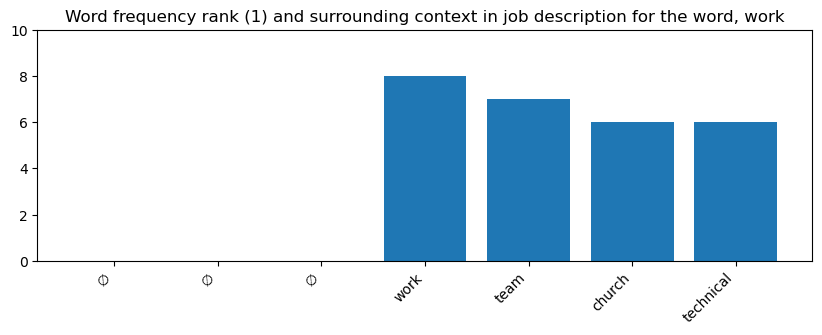

In [60]:
top_word_rank_in_desc = 1
this_desc_idx = top_word_rank_in_desc

this_corresponding_word = get_description_word_at_rank(top_word_rank_in_desc)

rank_desc, _ = find_word_in_both_display_lists(
                this_corresponding_word,
                description_word_counts[desc_fname_idx_to_show],
                application_word_counts[0],
                   #  we only have one table - 
                   #+ it's at any legal index;
                   #+ let's choose 0
                name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
                name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_desc = ""

if rank_desc is None:
    import matplotlib.image as mpimg
    fig_filename_desc = "description_word_not_found.png"
    img = mpimg.imread(fig_filename_desc)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    get_freq_histo_specific(
            description_word_counts[desc_fname_idx_to_show],
            rank_index_1=top_word_rank_in_desc,
            n_surrounding_words=3,
            do_show_word_and_count_lists=False,
            ylim_top_val=10)
    
    fig_filename_desc = (
            f"description_word_rank_{top_word_rank_in_desc}_"
            f"desc_{desc_fname_idx_to_show}.png"
    )

    title_for_desc = (f"Word frequency rank ({rank_desc}) and surrounding context in "
                      f"job description for the word, {this_corresponding_word}"
                 )
    plt.title(title_for_desc)

    plt.savefig(fig_filename_desc,
                bbox_inches='tight')

    plt.show()
##endof:  if/else rank_desc

In [48]:
this_corresponding_word = get_description_word_at_rank(top_word_rank_in_desc)
this_desc_idx = desc_fname_idx_to_show
word_indexes = find_word_in_both_display_lists(
                 this_corresponding_word,
                 description_word_counts[desc_fname_idx_to_show],
                 application_word_counts[0],
                   #  we only have one table - 
                   #+ it's at any legal index;
                   #+ let's choose 0
                 name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
                 name_of_display_list_2 = "application_word_counts[0]"                
)

print()
print( ("(rank in description, rank in application) for the word,"
        f" '{this_corresponding_word}': {word_indexes}"
       )
)

index_count_1: 1
my_entry_1: software
word_to_find: work
my_entry_1 == word_to_find: False
figure it out then press enter
index_count_1: 2
my_entry_1: work
word_to_find: work
my_entry_1 == word_to_find: True
figure it out then press enter
we got the match
word_found_in_1: True
index_for_found_in_1: 2

out of loop 1
press enter

my_entry_2: python
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: software
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: java
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: familysearch
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: family
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: programming
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: technical
word_to_find: work


In [53]:
this_word = this_corresponding_word
this_desc_idx = desc_fname_idx_to_show
word_indexes = find_word_in_both_display_lists(
                 this_word,
                 description_word_counts[desc_fname_idx_to_show],
                 application_word_counts[0],
                   #  we only have one table - 
                   #+ it's at any legal index;
                   #+ let's choose 0
                 name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
                 name_of_display_list_2 = "application_word_counts[0]"
                 
)

print()
print( ( "(rank in description, rank in application) for the word,"
        f" '{this_corresponding_word}': {word_indexes}"
       )
)

index_count_1: 1
my_entry_1: software
word_to_find: work
my_entry_1 == word_to_find: False
figure it out then press enter
index_count_1: 2
my_entry_1: work
word_to_find: work
my_entry_1 == word_to_find: True
figure it out then press enter
we got the match
word_found_in_1: True
index_for_found_in_1: 2

out of loop 1
press enter

my_entry_2: python
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: software
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: java
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: familysearch
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: family
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: programming
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: technical
word_to_find: work


index_count_1: 1
my_entry_1: software
word_to_find: work
my_entry_1 == word_to_find: False
figure it out then press enter
index_count_1: 2
my_entry_1: work
word_to_find: work
my_entry_1 == word_to_find: True
figure it out then press enter
we got the match
word_found_in_1: True
index_for_found_in_1: 2

out of loop 1
press enter

my_entry_2: python
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: software
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: java
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: familysearch
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: family
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: programming
word_to_find: work
my_entry_2 == word_to_find: False
figure it out then press enter
my_entry_2: technical
word_to_find: work


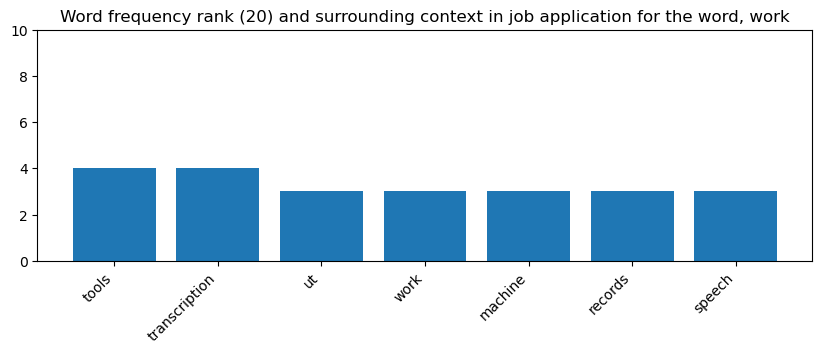

In [61]:
_, rank_appl = find_word_in_both_display_lists(
        this_corresponding_word,
        description_word_counts[desc_fname_idx_to_show],
        application_word_counts[0],
           #  we only have one table - 
           #+ it's at any legal index;
           #+ let's choose 0
        name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
        name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_appl = ""

if rank_appl is None:
    import matplotlib.image as mpimg
    fig_filename_appl = "application_word_not_found.png"
    img = mpimg.imread(fig_filename_appl)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    corresponding_index = rank_appl
    
    get_freq_histo_specific(application_word_counts[0],
                        rank_index_1=corresponding_index,
                        n_surrounding_words=3,
                        do_show_word_and_count_lists=False,
                        ylim_top_val=10)

    fig_filename_appl = (f"application_word_rank_{corresponding_index}_"
                         f"desc_{desc_fname_idx_to_show}.png"
                        )

    title_for_appl = (f"Word frequency rank ({rank_appl}) and surrounding context in "
                      f"job application for the word, {this_corresponding_word}"
                     )
    plt.title(title_for_appl)

    plt.savefig(fig_filename_appl,
            bbox_inches='tight')

    plt.show()
##endof:  ##endof:  if/else rank_desc

In [63]:
print("  img src values for the two images:")
print(f'"{fig_filename_desc}"')
print(f'"{fig_filename_appl}"')

print()
print("  img alt values for the two images:")
alt_text_1 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job description text"'
             )
alt_text_2 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job application text"'
             )
print(alt_text_1)
print(alt_text_2)

  img src values for the two images:
"description_word_rank_1_desc_0.png"
"application_word_rank_20_desc_0.png"

  img alt values for the two images:
"Histogram for the word, work, in the job description text"
"Histogram for the word, work, in the job application text"


### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source.

<br/>
<div>
  <img src="description_word_rank_1_desc_0.png"
       alt="Histogram for the word, work, in the job description text"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="application_word_rank_20_desc_0.png"
       alt="Histogram for the word, work, in the job application text"
       width="auto">
</div>
<br/>

In [64]:
#  Code to look for the top 25 (probably more) application
#+ (résumé) words (down to appearing 3 times -- not
#+ including 2) and see where they appear in the job
#+ descriptions (if at all.)

## Time for top-25 histograms (or whatever the discretized version is)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

## Next line only for Jupyter notebook.
%matplotlib inline

def get_histo_from_freq_dict(word_count_ordered_dict,
                             n_top_words = 25,
                             do_show_word_and_count_lists=False,
                             axx=None
                            ):
    '''
    @return  an axis from matplotlab (with the object - histogram - in it)
    '''
    
    if axx is None:
        fig = plt.figure(figsize=(10, 3))
        axx = fig.add_subplot(111)
    
    counts_pre = list(word_count_ordered_dict.values())
    words_pre  = list(word_count_ordered_dict.keys())
    
    counts = counts_pre[:n_top_words]
    words  = words_pre[:n_top_words]
    
    ## making sure things were working
    if do_show_word_and_count_lists:
        print(f"counts: {counts}")
        print(f"words:  {words}")
    ##endof:  if do_show_word_and_count_lists
    
    x_words_coords = np.arange(len(words))
    axx.bar(x_words_coords, counts, align='center')
    
    axx.set_xticks(x_words_coords)
    axx.set_xticklabels(words, rotation=45, ha='right')
    
##endof:  get_histo_from_freq_dict

counts: [10, 8, 7, 6, 6, 6, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
words:  ['software', 'work', 'team', 'church', 'technical', 'engineering', 'experience', 'development', 'professional', 'role', 'product', 'programming', 'seek', 'teams', 'job', 'industry', 'practices', 'position', 'areas', 'design', 'support', 'technology', 'provide', 'gospel', 'develop']


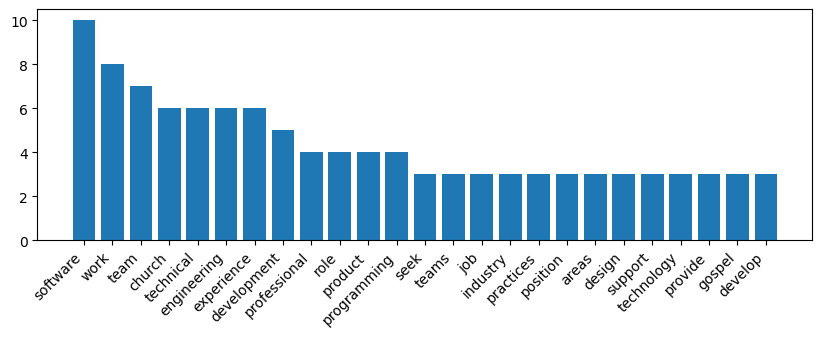

In [69]:
get_histo_from_freq_dict(description_word_counts[desc_fname_idx_to_show], 
                         do_show_word_and_count_lists=True)

desc_top_25_hist_fname = "top_25_description_words.png"
plt.savefig(desc_top_25_hist_fname,
            bbox_inches='tight')

plt.show()

counts: [10, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3]
words:  ['python', 'software', 'java', 'familysearch', 'family', 'programming', 'technical', 'learning', 'team', 'research', 'data', 'science', 'years', 'automated', 'aws', 'bash', 'c++', 'tools', 'transcription', 'ut', 'work', 'machine', 'records', 'speech', 'experience']


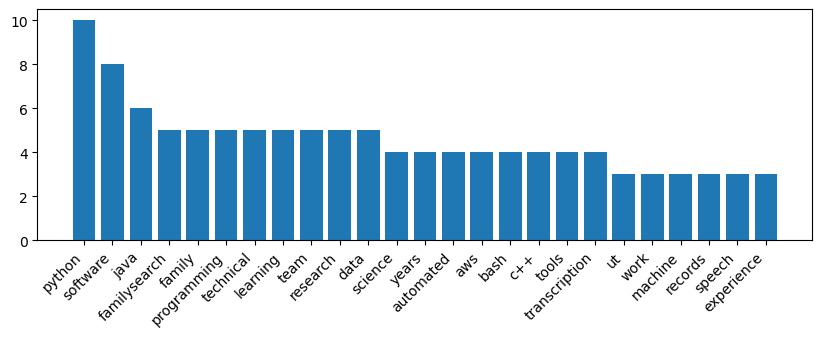

In [70]:
get_histo_from_freq_dict(application_word_counts[0],
                         do_show_word_and_count_lists=True)

appl_top_25_hist_fname = "top_25_application_words.png"
plt.savefig(appl_top_25_hist_fname,
            bbox_inches='tight')

plt.show()

## Output for Description and Application:

### &lt;FILL THIS IN&gt;

### Done

In [ ]:
# #######################
# # No need to run again
# #####
# !powershell -c (Get-Date -UFormat "%s_%Y%m%dT%H%M%S%Z00") -replace '[.][0-9]*_', '_'

The output when I actually did this was

```
<Here is where the output will go>
```

### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source.

In [71]:
print("  img src values for the two images:")
print(f'"{desc_top_25_hist_fname}"')
print(f'"{appl_top_25_hist_fname}"')

print()
print("  img alt values for the two images:")
wd_count_alt_text_1 = '"The histogram for the job description with word frequencies"'
wd_count_alt_text_2 = '"The histogram for the job application with word frequencies"'

print(wd_count_alt_text_1)
print(wd_count_alt_text_2)

  img src values for the two images:
"top_25_description_words.png"
"top_25_application_words.png"

  img alt values for the two images:
"The histogram for the job description with word frequencies"
"The histogram for the job application with word frequencies"


The output histograms, stacked for easier view.

_Remember that you might need to double click on the images to change the img src and img alt values._

<br/>
<div>
  <img src="top_25_description_words.png"
       alt="The histogram for the job description with word frequencies"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="top_25_application_words.png"
       alt="The histogram for the job application with word frequencies"
       width="auto">
</div>
<br/>

Sometimes, I'll grab a printscreen of the above two images and draw green lines between words that match. However, from the time when I allowed the view of the match and three surrounding words, this step hasn't seemed as vital.

If this is going to happen, double click on this cell to see the now-commented HTML, get your saved filename, change the HTML accordingly, and uncomment everything. (HTML Comments start with `<!--` and end with `-->`

<!--
<br/>
<div>
  <img src="word_frequency_plots_w_link_lines.jpg"
       alt="Word matches for the pair of histograms."
       width="100%">
</div>
<br/>
-->

## Future Steps

- Look at ranking, counts, percentage, etc. for FamilySearch's (job description's) top 25 words as found in my (job application's) word counts, then vice-versa. 
  - Code setup completed 2023-08-20. Putting all 25 in would make a very busy display, so I just did a few.
- Get rid of words that are necessary for grammar, but which don't matter too much in determining whether the two documents match up. (Found term on 2023-08-07. It's "stopwords".)
  - Completed 2023-08-09